In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Load and preprocess the data
file_path = '/content/yahoo_data.xlsx'
data = pd.read_excel(file_path)

In [ ]:
# Ensure the date column is sorted and convert to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)


In [ ]:
# Select the 'Close*' column for prediction and normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close*'].values.reshape(-1, 1))

In [ ]:
# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Sequence length for time-series
X, y = create_sequences(data_scaled, seq_length)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, 1)),
    Bidirectional(LSTM(32)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.1374 - val_loss: 0.0085
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0065 - val_loss: 0.0056
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

Train Loss: 0.000635082833468914
Test Loss: 0.0007960900547914207


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [ ]:
# Inverse transform predictions and actual values for comparison
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

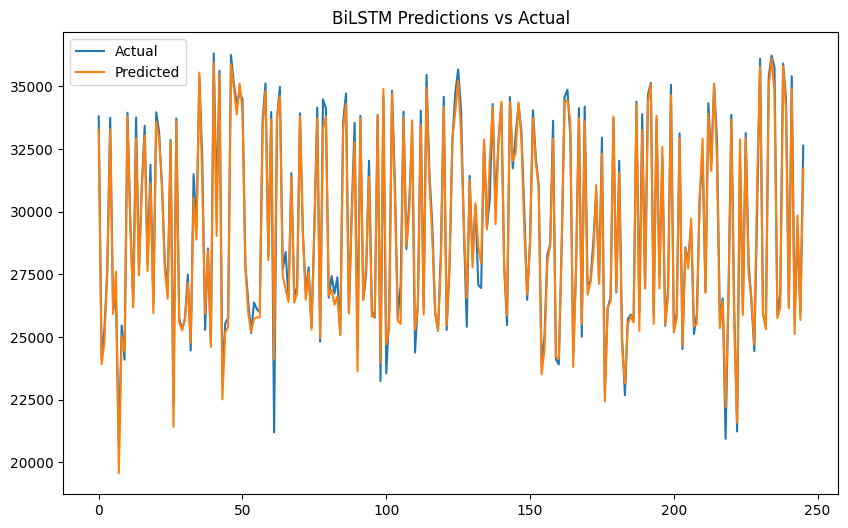

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('BiLSTM Predictions vs Actual')
plt.legend()
plt.show()
